# Работа с датасетом с datahub.io, данные по среднему кумулятивному балансу массы эталонных ледников по всему миру

Баланс массы ледника - это чистое изменение его массы за балансовый или фиксированный год. Если накопление превышает абляцию за данный год, баланс массы положительный; если верно обратное, баланс массы отрицательный. Изменение климата может вызывать колебания как температуры, так и снегопадов, вызывая изменения баланса массы поверхности ледников. Изменения баланса массы контролируют долгосрочное поведение ледников и являются наиболее чувствительными индикаторами климата на ледниках. 

Данные для проекта были взяты с сайта https://datahub.io/core/glacier-mass-balance#data-cli. В текстовом файле содержатся данные о среднем кумулятивном балансе массы "эталонных" ледников по всему миру за 1945-2014 гг. по данным Агентства по охране окружающей среды США (EPA) и Всемирной службы мониторинга ледников (WGMS). Отрицательные значения указывают на чистую потерю льда и снега по сравнению с базовым 1945 годом. Для единообразия измерения проводятся в метрах водного эквивалента, которые представляют собой изменения массы в средней толщине ледника.

Исследование на основе датасета:

1. Вычисления на основе датасета, в какой год кумулятивный баланс был максимальным и минимальным? Приведи пять лет с самым минимальным и максимальным кумулятивным балансом. В какой год было проведено наибольшее количество наблюдений и измерений баланса ледников?
2. Отслеживание динамики баланса с помощью Matplotlib

## Подготовка датасета, создание списков с тремя типами значений (год измерений, кумулятивный баланс массы, количество измерений)

In [25]:
with open(r'C:\Users\yana3\OneDrive\Desktop\python_project1_Solovieva\Glaciers.txt', encoding = 'utf-8') as file:
    data = file.readlines()

years = []
balances = []
measurements = []

for line in data:
    year, balance, measurement = line.strip().split(',')
    years.append(int(year))
    balances.append(float(balance))
    measurements.append(int(measurement))

print("Годы измерений:", years)
print("Кумулятивный баланс ледников:", balances)
print("Количество измерений:", measurements)

Годы измерений: [1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
Кумулятивный баланс ледников: [0.0, -1.13, -3.19, -3.19, -3.82, -4.887, -5.217, -5.707, -6.341, -6.825, -6.575, -6.814, -6.989, -7.693, -8.325, -8.688, -8.935, -9.109, -9.567, -9.699, -9.298, -9.436, -9.303, -9.219, -9.732, -10.128, -10.288, -10.441, -10.538, -10.613, -10.534, -10.633, -10.682, -10.754, -11.127, -11.318, -11.394, -11.849, -11.846, -11.902, -12.238, -12.782, -12.795, -13.26, -13.343, -13.687, -14.255, -14.501, -14.695, -15.276, -15.486, -15.89, -16.487, -17.31, -17.697, -17.727, -18.032, -18.726, -19.984, -20.703, -21.405, -22.595, -23.255, 

## 1. Вычисления на основе данных, в какой год кумулятивный баланс был максимальным и минимальным? В какой год было проведено наибольшее количество наблюдений и измерений баланса ледников?

In [28]:
# Вычисление максимального баланса
max_balance_year = years[balances.index(max(balances))]
print(f"Год с максимальным кумулятивным балансом мировых ледников: {max_balance_year}")

# Вычисление минимального баланса
min_balance_year = years[balances.index(min(balances))]
print(f"Год с минимальным кумулятивным балансом мировых ледников: {min_balance_year}")

# Сортировка по годам
sorted_balances = sorted(balances)
min_years = [years[balances.index(balance)] for balance in sorted_balances[:5]]
max_years = [years[balances.index(balance)] for balance in sorted_balances[-5:]]
print(f"Пять лет с самым минимальным балансом: {min_years}")
print(f"Пять лет с самым максимальным балансом: {max_years}")

# Наибольшее количество измерений
max_measurements_index = measurements.index(max(measurements))
year_with_max_measurements = years[max_measurements_index]

print(f"В {year_with_max_measurements} году было проведено наибольшее количество наблюдений и измерений баланса ледников.")

Год с максимальным кумулятивным балансом мировых ледников: 1945
Год с минимальным кумулятивным балансом мировых ледников: 2014
Пять лет с самым минимальным балансом: [2014, 2013, 2012, 2011, 2010]
Пять лет с самым максимальным балансом: [1949, 1947, 1947, 1946, 1945]
В 1977 году было проведено наибольшее количество наблюдений и измерений баланса ледников.


## 2. Отслеживание динамики баланса массы ледников и годовых аномалий темератур с помощью Matplotlib, сопоставление двух графиков

['1945,0,1\n', '1946,-1.13,1\n', '1947,-3.19,1\n', '1948,-3.19,1\n', '1949,-3.82,3\n', '1950,-4.887,3\n', '1951,-5.217,3\n', '1952,-5.707,3\n', '1953,-6.341,7\n', '1954,-6.825,6\n', '1955,-6.575,7\n', '1956,-6.814,7\n', '1957,-6.989,9\n', '1958,-7.693,9\n', '1959,-8.325,11\n', '1960,-8.688,14\n', '1961,-8.935,15\n', '1962,-9.109,20\n', '1963,-9.567,22\n', '1964,-9.699,22\n', '1965,-9.298,24\n', '1966,-9.436,27\n', '1967,-9.303,29\n', '1968,-9.219,31\n', '1969,-9.732,31\n', '1970,-10.128,32\n', '1971,-10.288,32\n', '1972,-10.441,32\n', '1973,-10.538,32\n', '1974,-10.613,32\n', '1975,-10.534,33\n', '1976,-10.633,35\n', '1977,-10.682,37\n', '1978,-10.754,37\n', '1979,-11.127,37\n', '1980,-11.318,36\n', '1981,-11.394,35\n', '1982,-11.849,36\n', '1983,-11.846,37\n', '1984,-11.902,37\n', '1985,-12.238,37\n', '1986,-12.782,37\n', '1987,-12.795,37\n', '1988,-13.26,37\n', '1989,-13.343,37\n', '1990,-13.687,37\n', '1991,-14.255,37\n', '1992,-14.501,36\n', '1993,-14.695,37\n', '1994,-15.276,37\n'

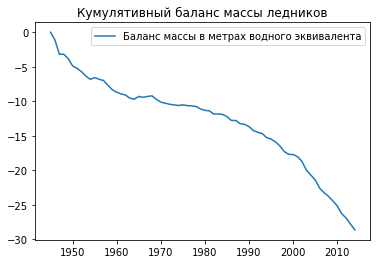

In [5]:
with open(r'C:\Users\Анастасия\Desktop\pythonpr\Glaciers.txt') as f:
    glacier = f.readlines()
    print (glacier)
years = []
mass_balances = []
obss = []

for line in glacier:
    year, mass_balance, obs = line.strip().split(',')
    years.append(int(year))
    mass_balances.append(float(mass_balance))
    obss.append(int(obs))
print ('Годы', years)
print ('Баланс массы', mass_balances)
print ('Количество наблюдений', obss)

from matplotlib import pyplot as plt

plt.plot(years, mass_balances, label='Баланс массы в метрах водного эквивалента')
plt.title('Кумулятивный баланс массы ледников')
plt.legend()
plt.show()

Годы [1945. 1945. 1945. 1945. 1945. 1945. 1945. 1945. 1945. 1945. 1945. 1945.
 1946. 1946. 1946. 1946. 1946. 1946. 1946. 1946. 1946. 1946. 1946. 1946.
 1947. 1947. 1947. 1947. 1947. 1947. 1947. 1947. 1947. 1947. 1947. 1947.
 1948. 1948. 1948. 1948. 1948. 1948. 1948. 1948. 1948. 1948. 1948. 1948.
 1949. 1949. 1949. 1949. 1949. 1949. 1949. 1949. 1949. 1949. 1949. 1949.
 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950.
 1951. 1951. 1951. 1951. 1951. 1951. 1951. 1951. 1951. 1951. 1951. 1951.
 1952. 1952. 1952. 1952. 1952. 1952. 1952. 1952. 1952. 1952. 1952. 1952.
 1953. 1953. 1953. 1953. 1953. 1953. 1953. 1953. 1953. 1953. 1953. 1953.
 1954. 1954. 1954. 1954. 1954. 1954. 1954. 1954. 1954. 1954. 1954. 1954.
 1955. 1955. 1955. 1955. 1955. 1955. 1955. 1955. 1955. 1955. 1955. 1955.
 1956. 1956. 1956. 1956. 1956. 1956. 1956. 1956. 1956. 1956. 1956. 1956.
 1957. 1957. 1957. 1957. 1957. 1957. 1957. 1957. 1957. 1957. 1957. 1957.
 1958. 1958. 1958. 1958. 1958. 1958. 1958. 195

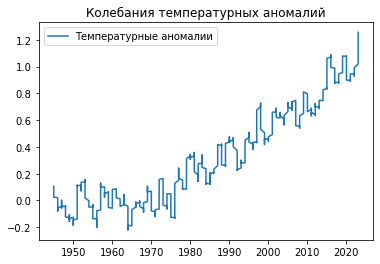

In [40]:
import numpy as np
temps = np.loadtxt(r'C:\Users\Анастасия\Desktop\pythonpr\temps.txt')
years2 = temps[:,0]
anomaly = temps[:,4]
print ('Годы', years2)
print ('Годовые аномалии температуры', anomaly)

from matplotlib import pyplot as plt

plt.plot(years2, anomaly, label='Температурные аномалии')
plt.title('Колебания температурных аномалий')
plt.legend()
plt.show()

# Сопоставление двух графиков

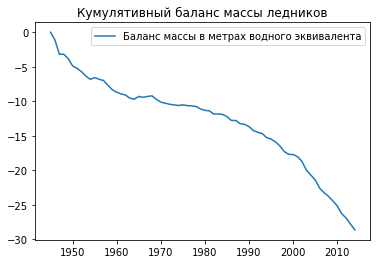

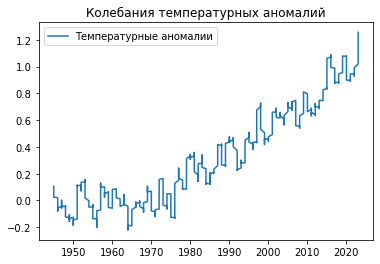

In [41]:
plt.plot(years, mass_balances, label='Баланс массы в метрах водного эквивалента')
plt.title('Кумулятивный баланс массы ледников')
plt.legend()
plt.show()

plt.plot(years2, anomaly, label='Температурные аномалии')
plt.title('Колебания температурных аномалий')
plt.legend()
plt.show()